## Merge file 

In [82]:
import csv
import pandas as pd 

# Generate filenames programmatically
files = ["ResultStat/_new_final_balance_{}.csv".format(i) for i in range(100)]

merged_filename = "stat_merge_result.csv"

with open(merged_filename, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    for index, filename in enumerate(files):
        with open(filename, 'r') as infile:
            reader = csv.reader(infile)
            
            # Skip header only if it's not the first file
            if index != 0:
                next(reader, None)
                
            # Write rows from current file to the output file
            writer.writerows(reader)

## Find average of each betting agents. 

In [83]:
import pandas as pd

# Read the data
df = pd.read_csv("stat_merge_result.csv", header=None)

# Drop the header row
df = df.drop(0)

# Convert all values to float
df = df.astype(float)

# Define ranges for mapping => to group agents with same type/category
ranges = [ 
    (0, 10, 1),
    (10, 20, 2),
    (20, 30, 3),
    (30, 40, 4),
    (40, 50, 5),
    (50, 55, 6),
    (55, 60, 7)
]

# Create a mapping function based on ranges
def get_mapping(col):
    for start, end, category in ranges:
        if start <= col < end:
            return category

# Create a new DataFrame with mapped columns
mapped_df = df.copy()
mapped_df.columns = [get_mapping(col) for col in df.columns]

# Group by column categories and compute the mean
averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()
averaged_df = averaged_df - 100000000

print(averaged_df)


              1           2          3           4          5            6  \
1    -70.583010 -370.197308 -84.571285    2.956927  72.182555  1592.433085   
2     64.003238 -579.847495   5.435460  -75.316747   4.500000  -467.440557   
3   -156.437169 -188.921103   4.129426 -153.547763  47.875290   413.331908   
4   -112.439225 -137.721476 -24.083311 -174.042617  16.151846   197.085915   
5   -100.976945  140.971614 -13.793084  -21.123055  10.500000  -605.700000   
..          ...         ...        ...         ...        ...          ...   
96  -336.659846   -5.434975   6.475865  -69.228692  30.339726   570.061697   
97  -315.705215  350.532785 -13.285485  -59.795285   8.100000  -393.273402   
98  -213.433442  272.688809  -1.800000 -135.312782  20.613469  -592.255929   
99   268.882857  432.868777 -43.578297 -378.594951  74.369845  -226.395216   
100 -129.149299  572.421190 -31.953849 -254.467732  12.930319 -1039.652490   

               7  
1    -692.008844  
2    1629.891644  
3     

# Plotting profit

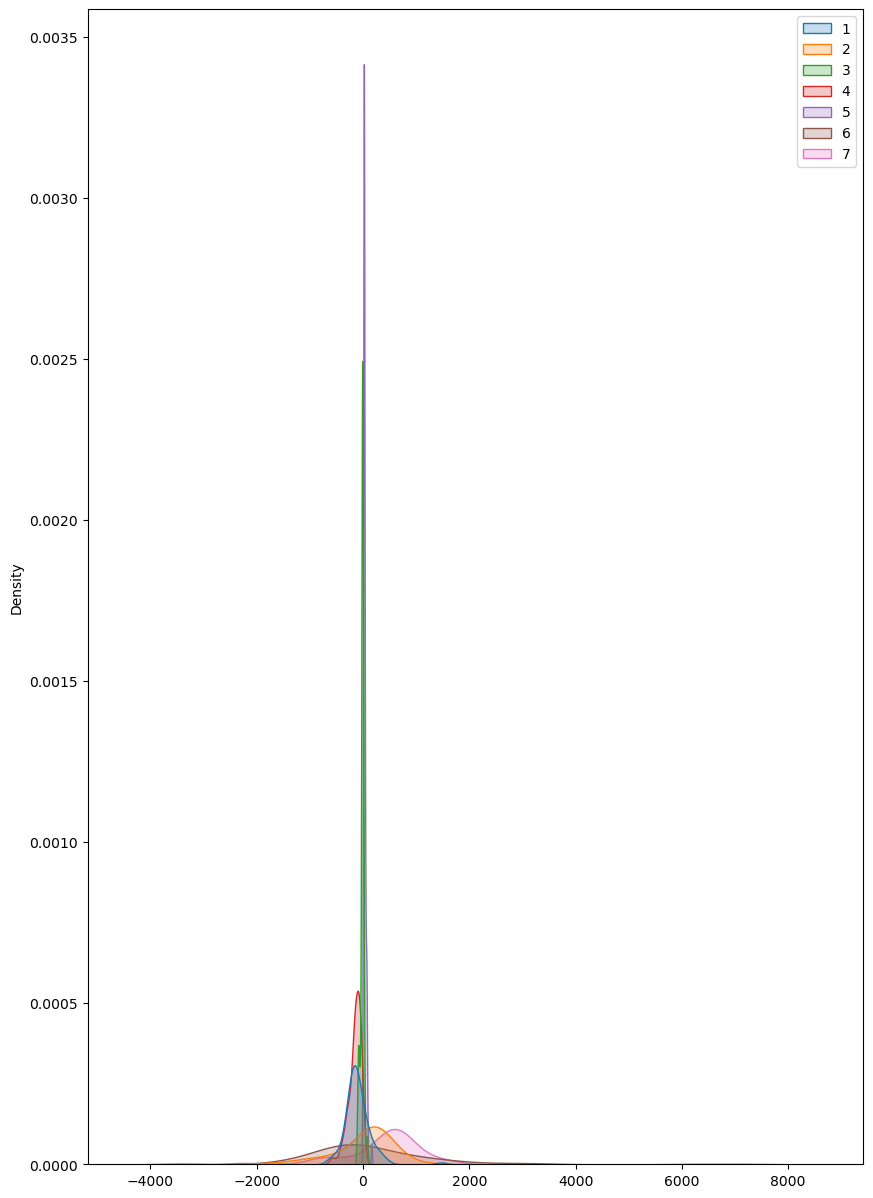

In [84]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
distributionPlot = sns.kdeplot(data=averaged_df,fill=True)
plt.show()


## Statistical Testing

In [90]:
from scipy import stats
xgboost_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    # Check normality for both columns
    _, pvalue_xgboost = stats.shapiro(xgboost_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost",pvalue_xgboost)
    print("pvalue_other_agent ",pvalue_other_agent)
    # If both are normally distributed
    if pvalue_xgboost > 0.05 and pvalue_other_agent > 0.05:
        
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  7.973646742875928e-10
not normal
There is a statistically significant difference
P-Value 6.6250153490875e-14

P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  1.3186210456872516e-10
not normal
There is a statistically significant difference
P-Value 7.369499926662655e-09

P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  6.320791499092593e-07
not normal
There is a statistically significant difference
P-Value 1.4679603272572638e-13

P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  1.3464713219946134e-06
not normal
There is a statistically significant difference
P-Value 1.985693443146762e-15

P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  4.101292638836185e-10
not normal
There is a statistically significant difference
P-Value 2.449594716005794e-13

P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  2.2829092782838956e-11
not normal
There is a statistically significant difference
P-V

# Stat test with plotting

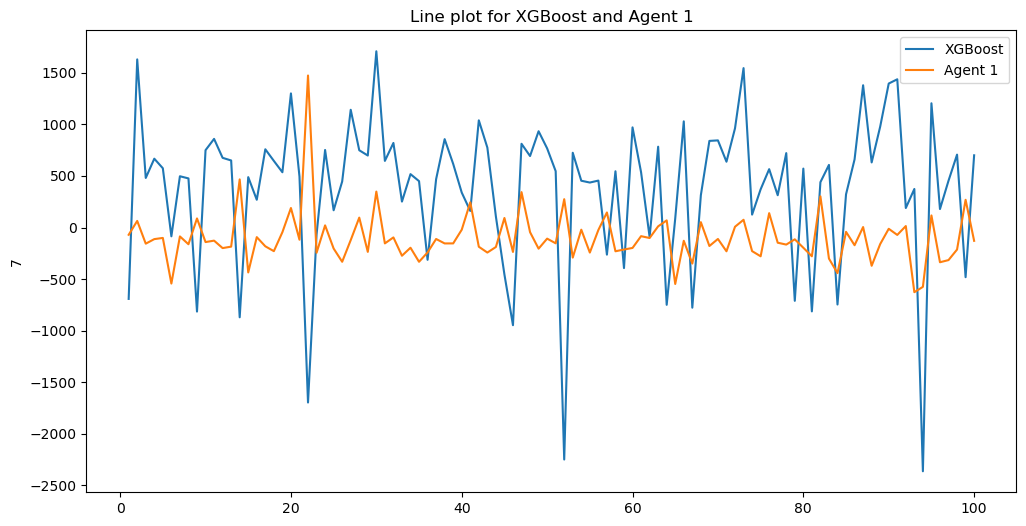

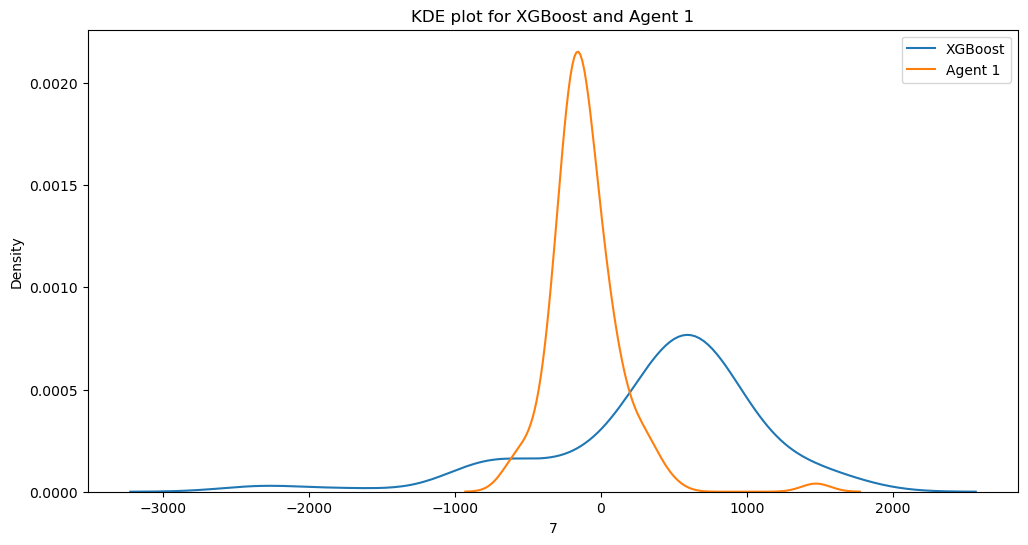

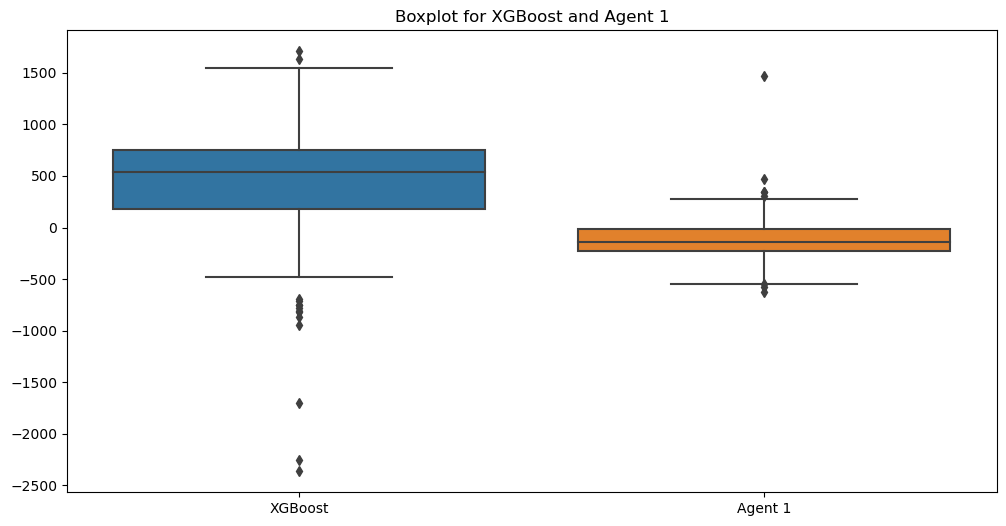

P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  7.973646742875928e-10
not normal
There is a statistically significant difference
P-Value 6.6250153490875e-14



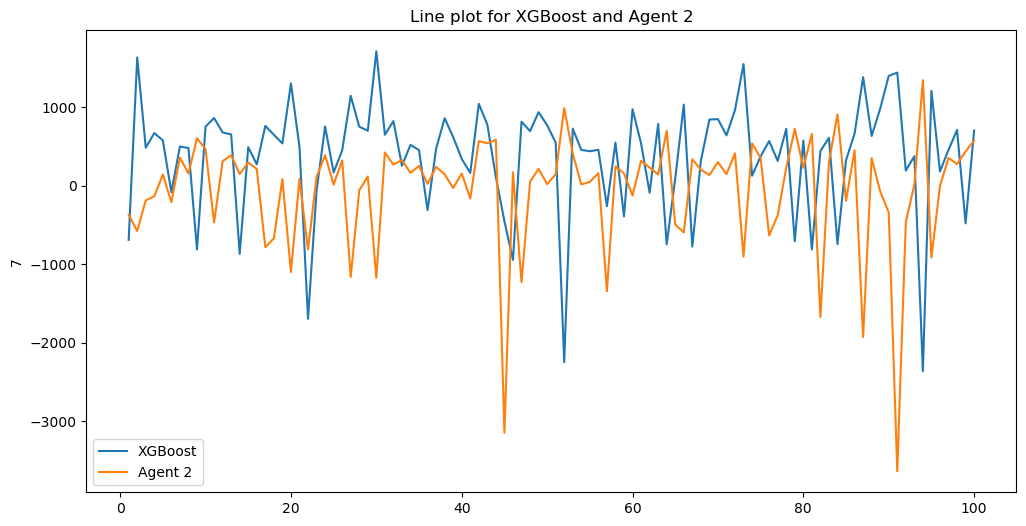

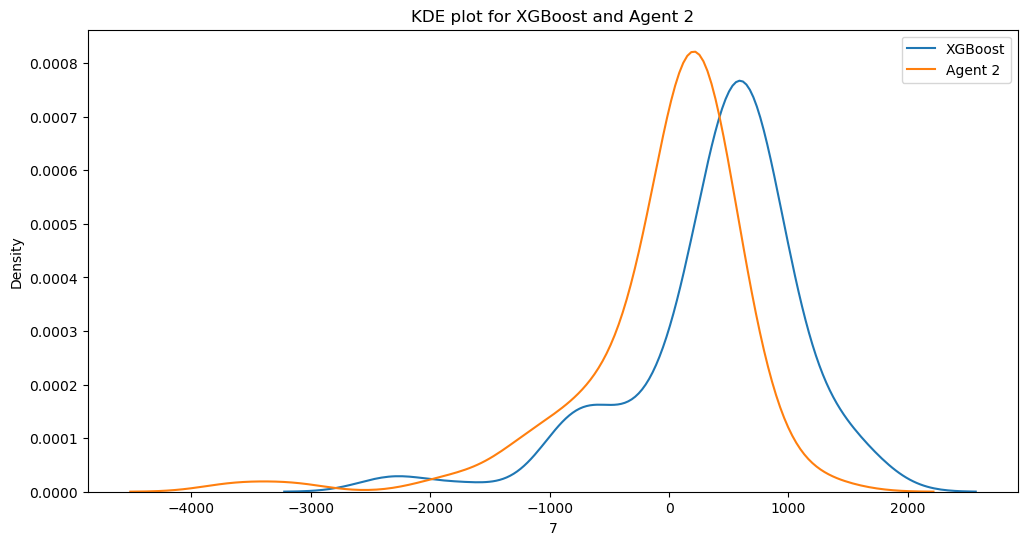

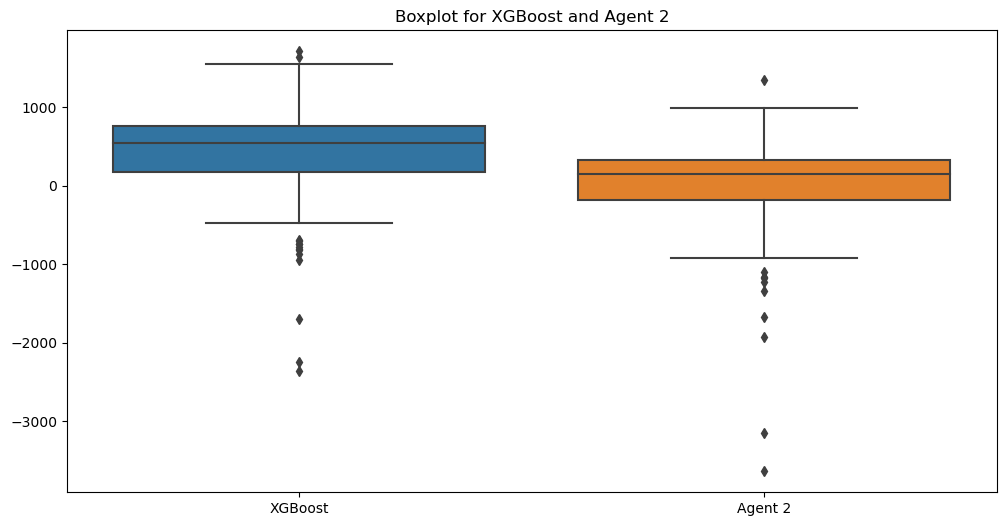

P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  1.3186210456872516e-10
not normal
There is a statistically significant difference
P-Value 7.369499926662655e-09



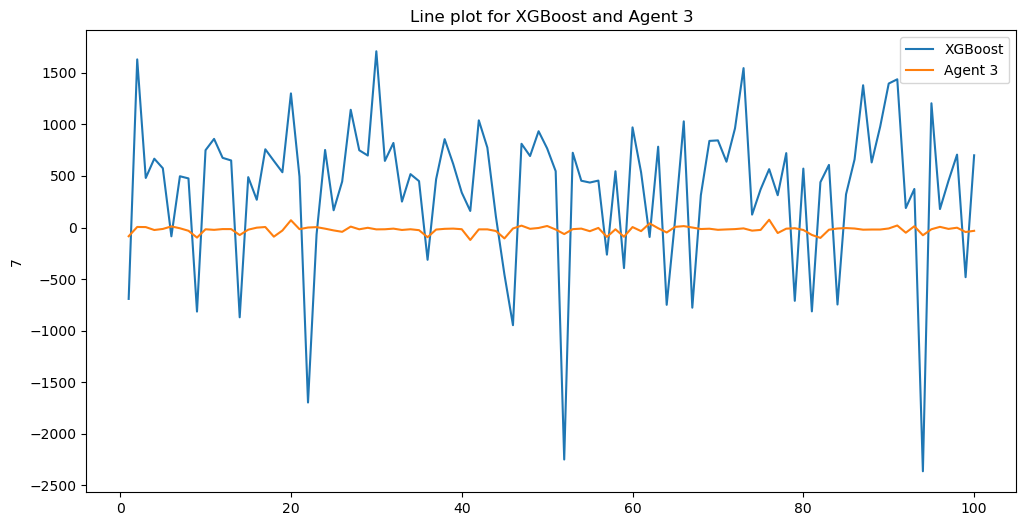

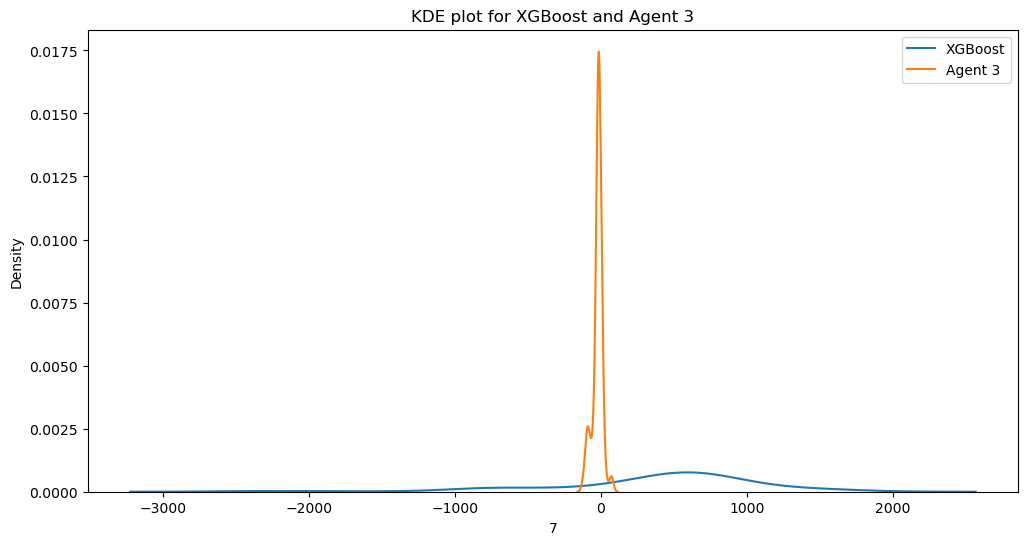

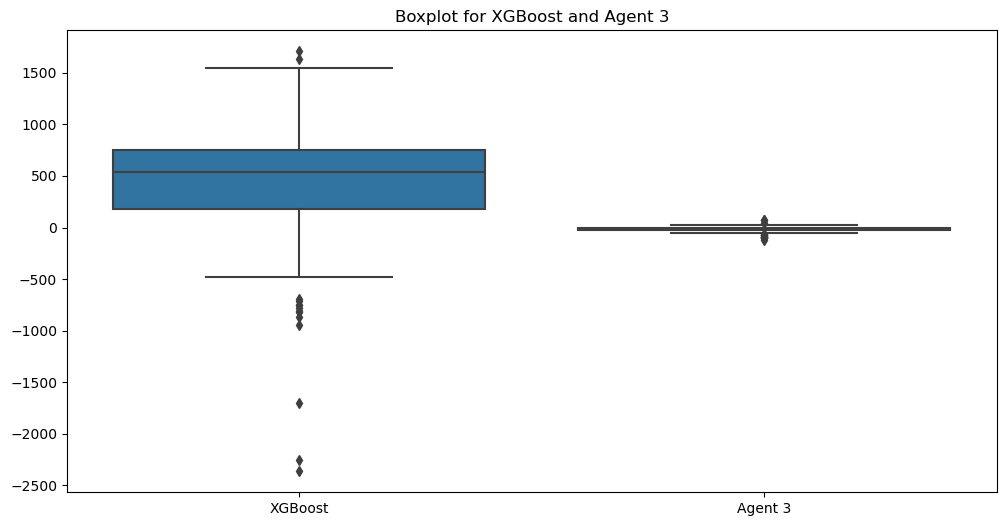

P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  6.320791499092593e-07
not normal
There is a statistically significant difference
P-Value 1.4679603272572638e-13



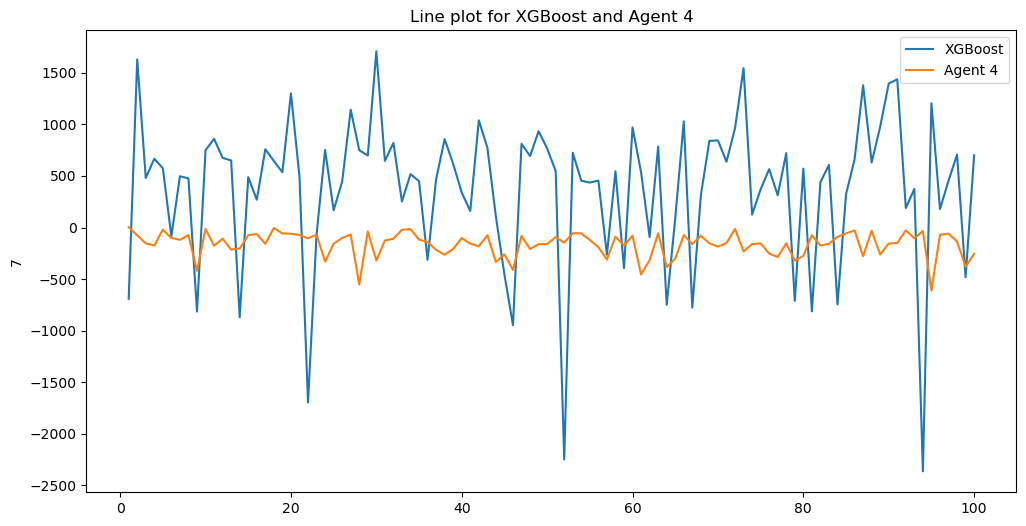

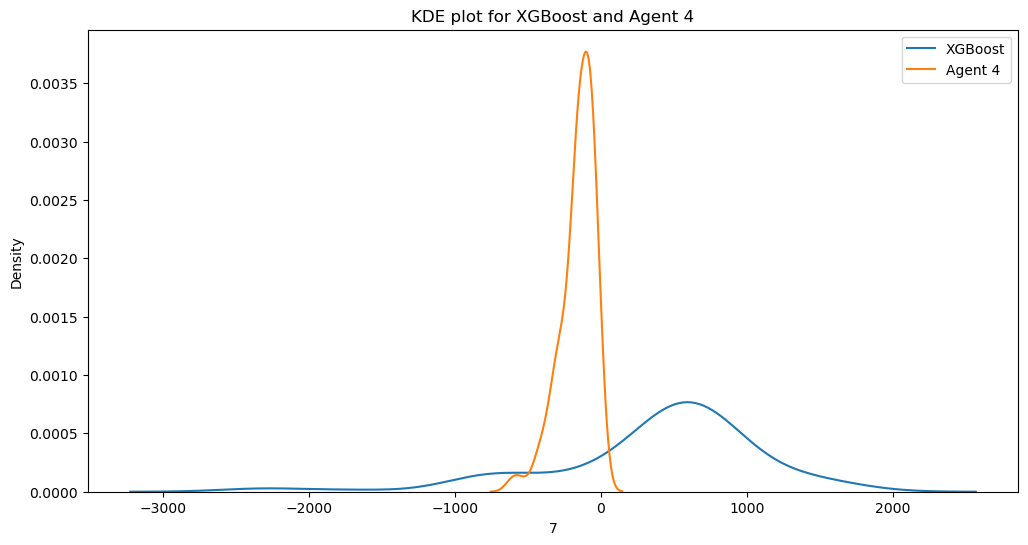

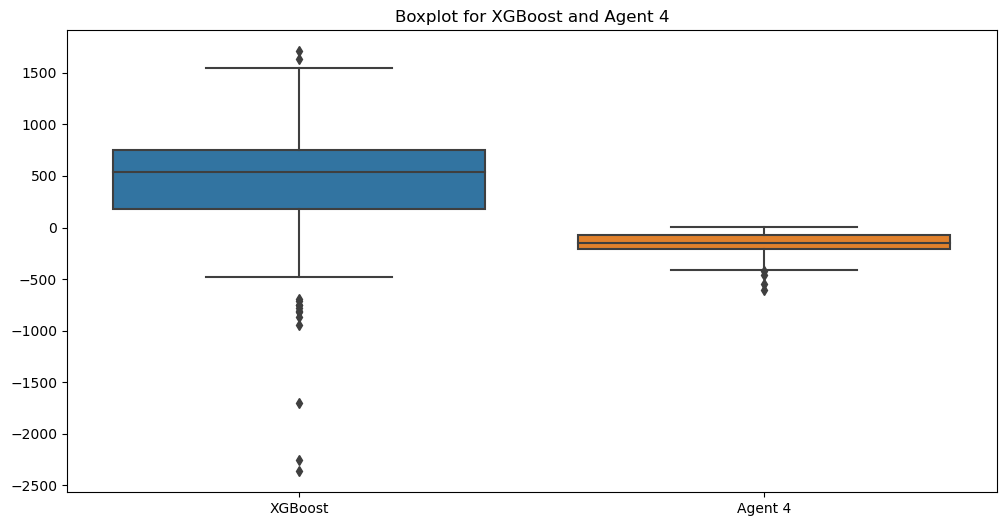

P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  1.3464713219946134e-06
not normal
There is a statistically significant difference
P-Value 1.985693443146762e-15



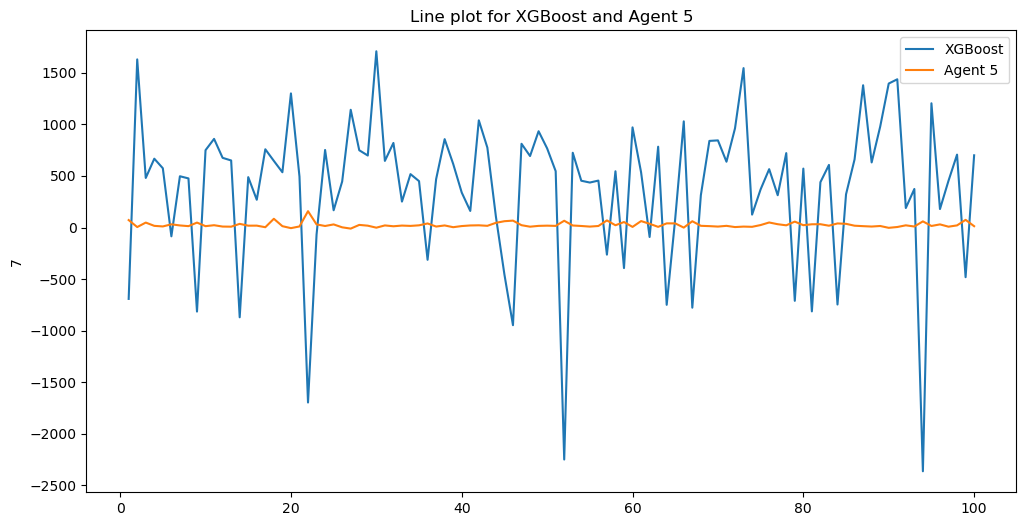

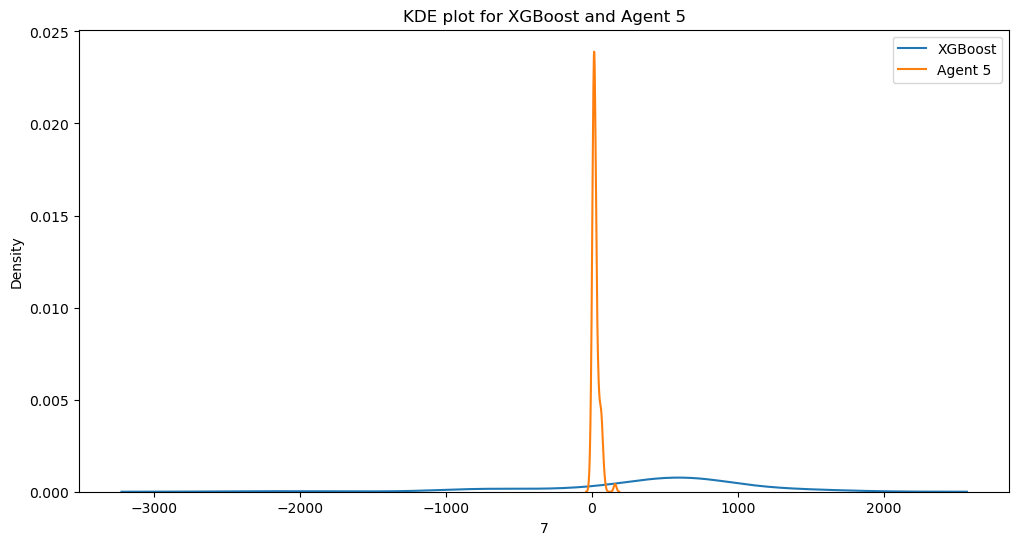

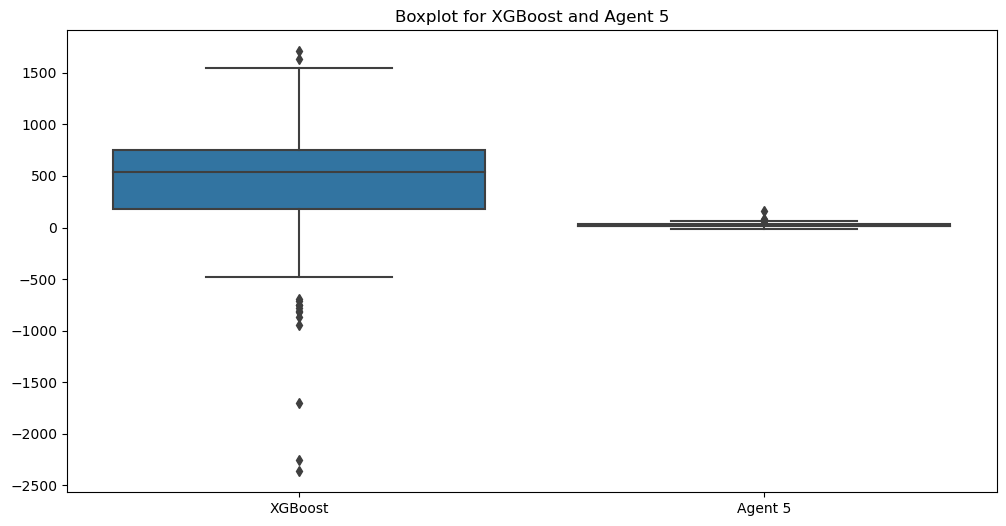

P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  4.101292638836185e-10
not normal
There is a statistically significant difference
P-Value 2.449594716005794e-13



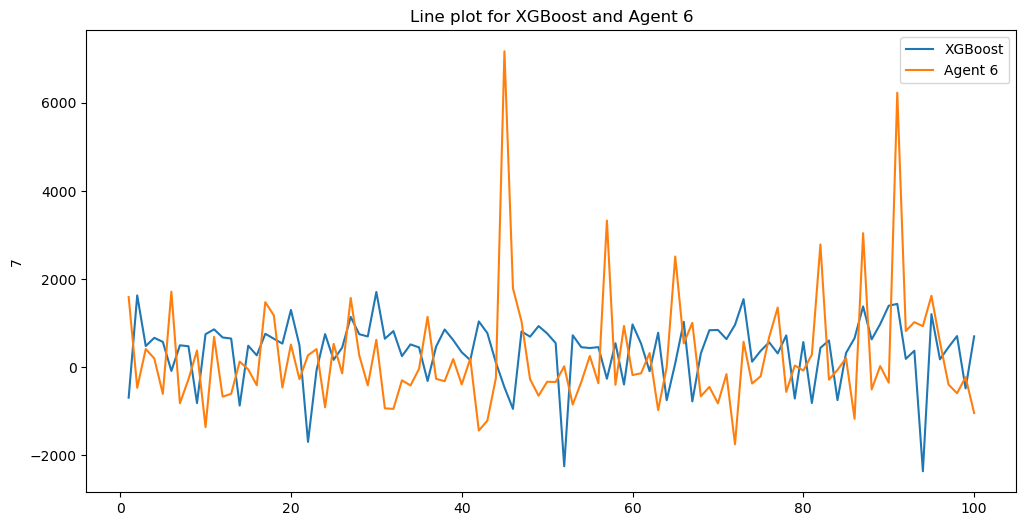

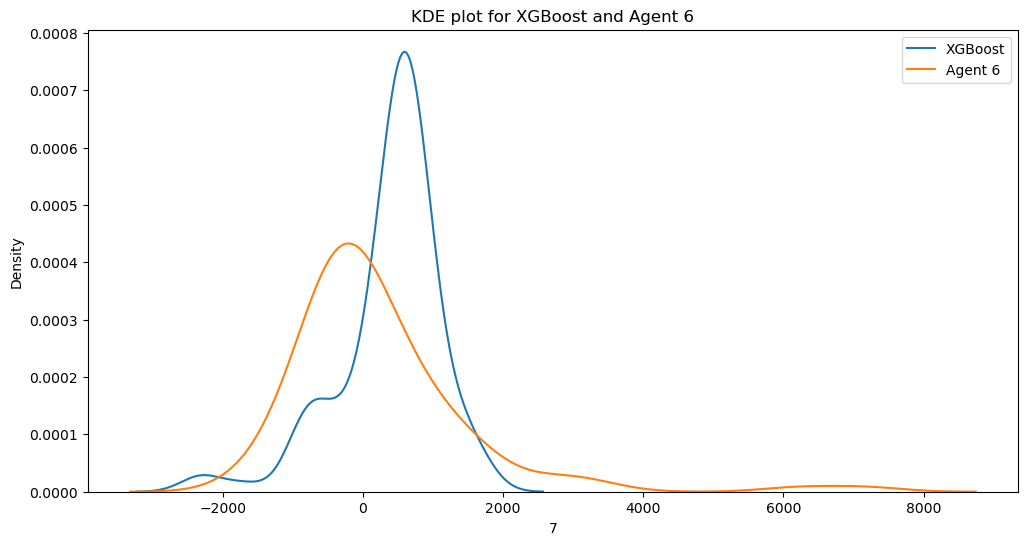

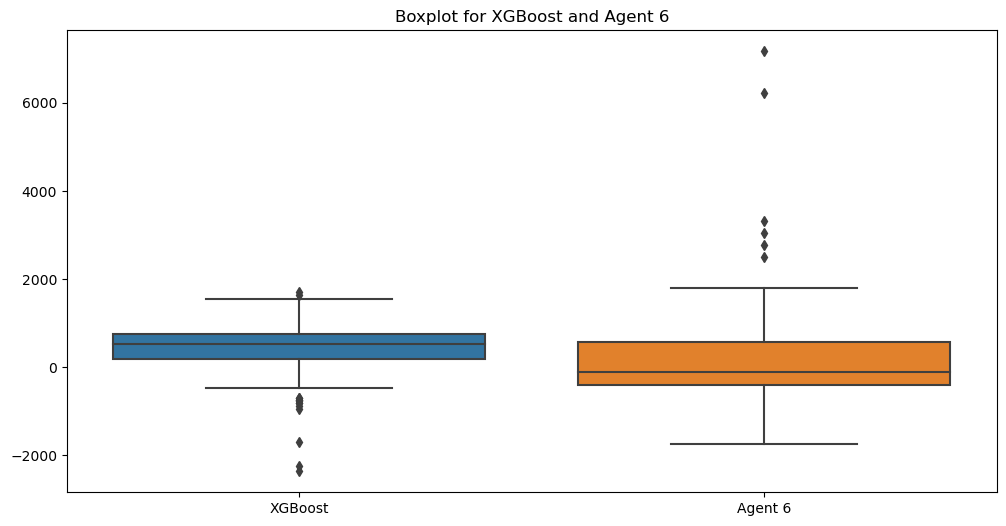

P_value_xgboost 2.3448407659998338e-07
pvalue_other_agent  2.2829092782838956e-11
not normal
There is a statistically significant difference
P-Value 0.0004649884310517811



In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]

    # Line plot for XGBoost and the other agent
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=xgboost_avg_balance, label='XGBoost')
    sns.lineplot(data=other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('Line plot for XGBoost and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # KDE plot for the distributions
    plt.figure(figsize=(12, 6))
    sns.kdeplot(xgboost_avg_balance, label='XGBoost')
    sns.kdeplot(other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('KDE plot for XGBoost and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost_avg_balance.rename('XGBoost'), 
                               other_agent_balance.rename('Agent ' + str(col_index+1))], axis=1)
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined_data)
    plt.title('Boxplot for XGBoost and Agent ' + str(col_index+1))
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost = stats.shapiro(xgboost_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost", pvalue_xgboost)
    print("pvalue_other_agent ", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


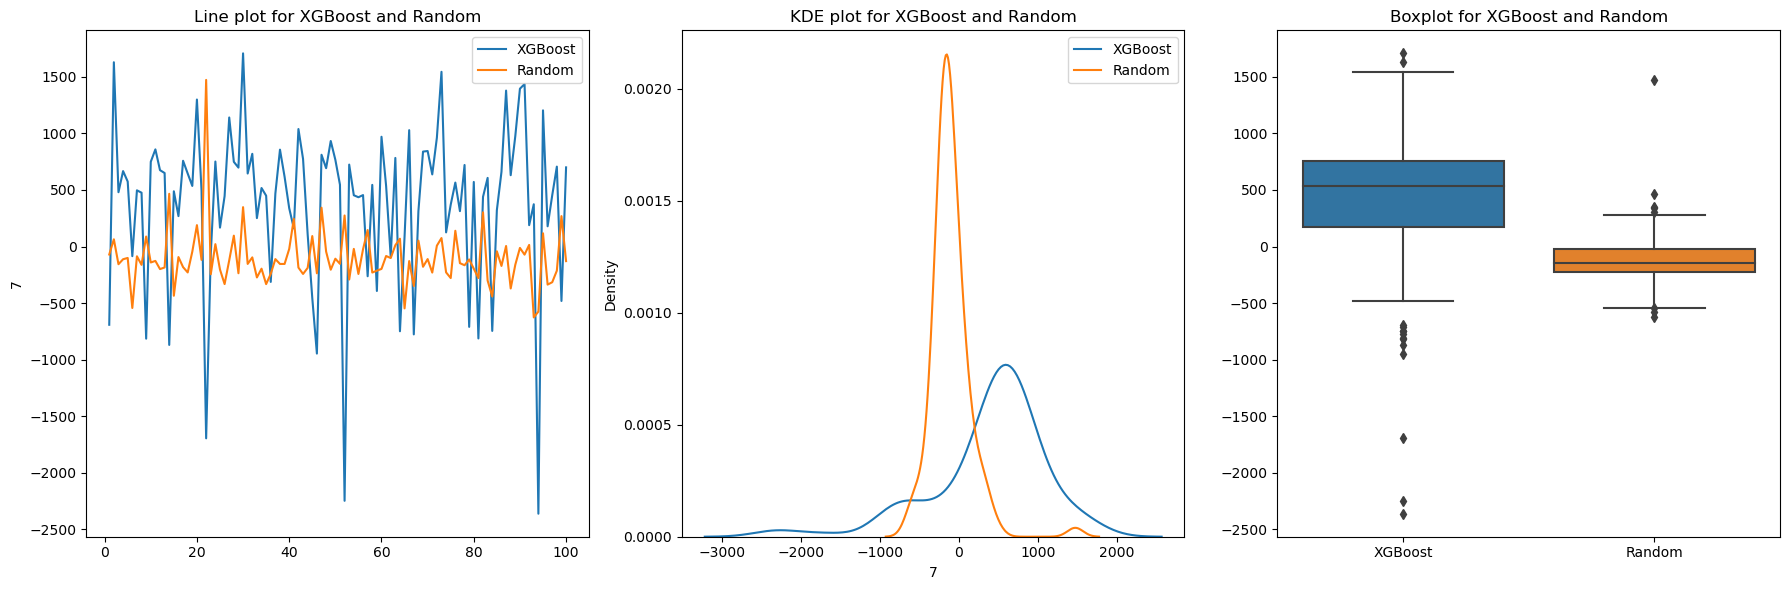

P_value_xgboost 2.3448407659998338e-07
P_value_Random 7.973646742875928e-10
not normal
There is a statistically significant difference
P-Value 6.6250153490875e-14



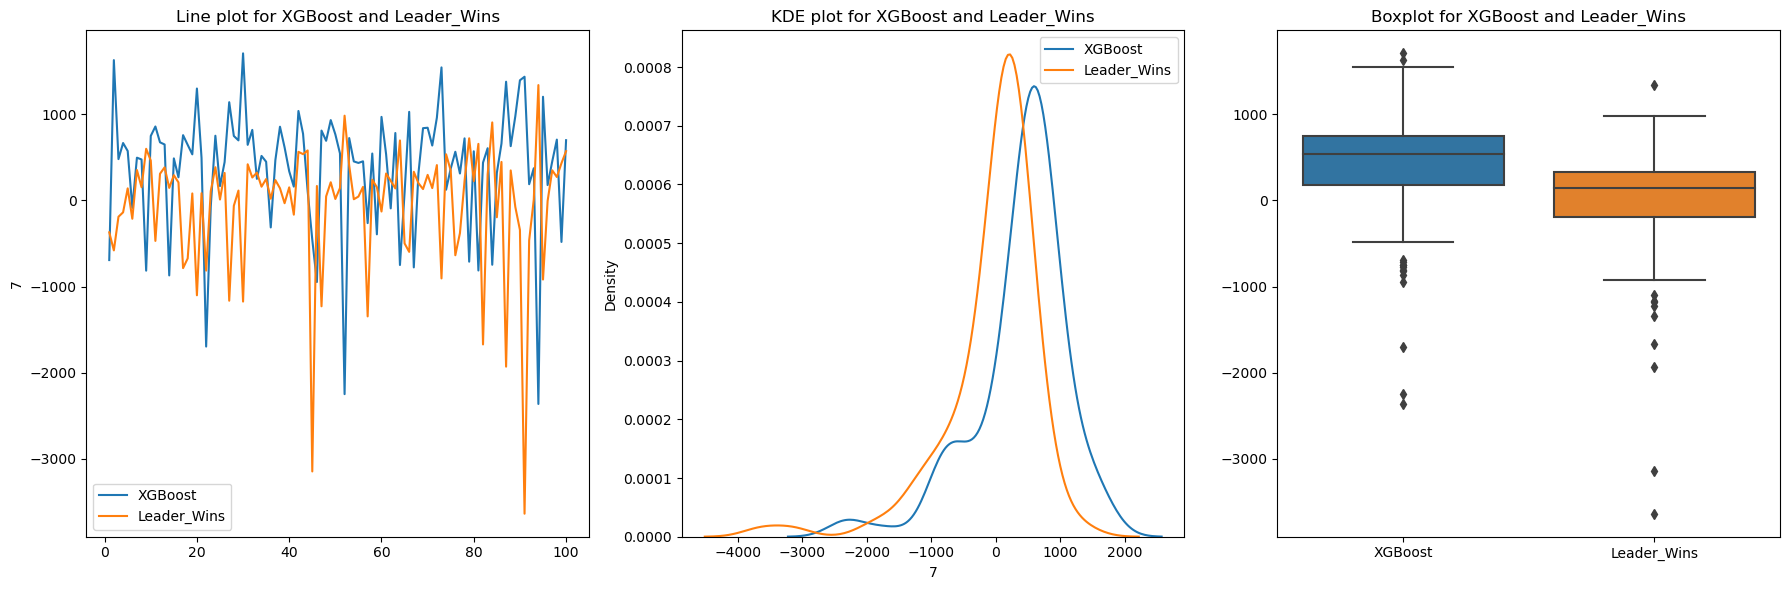

P_value_xgboost 2.3448407659998338e-07
P_value_Leader_Wins 1.3186210456872516e-10
not normal
There is a statistically significant difference
P-Value 7.369499926662655e-09



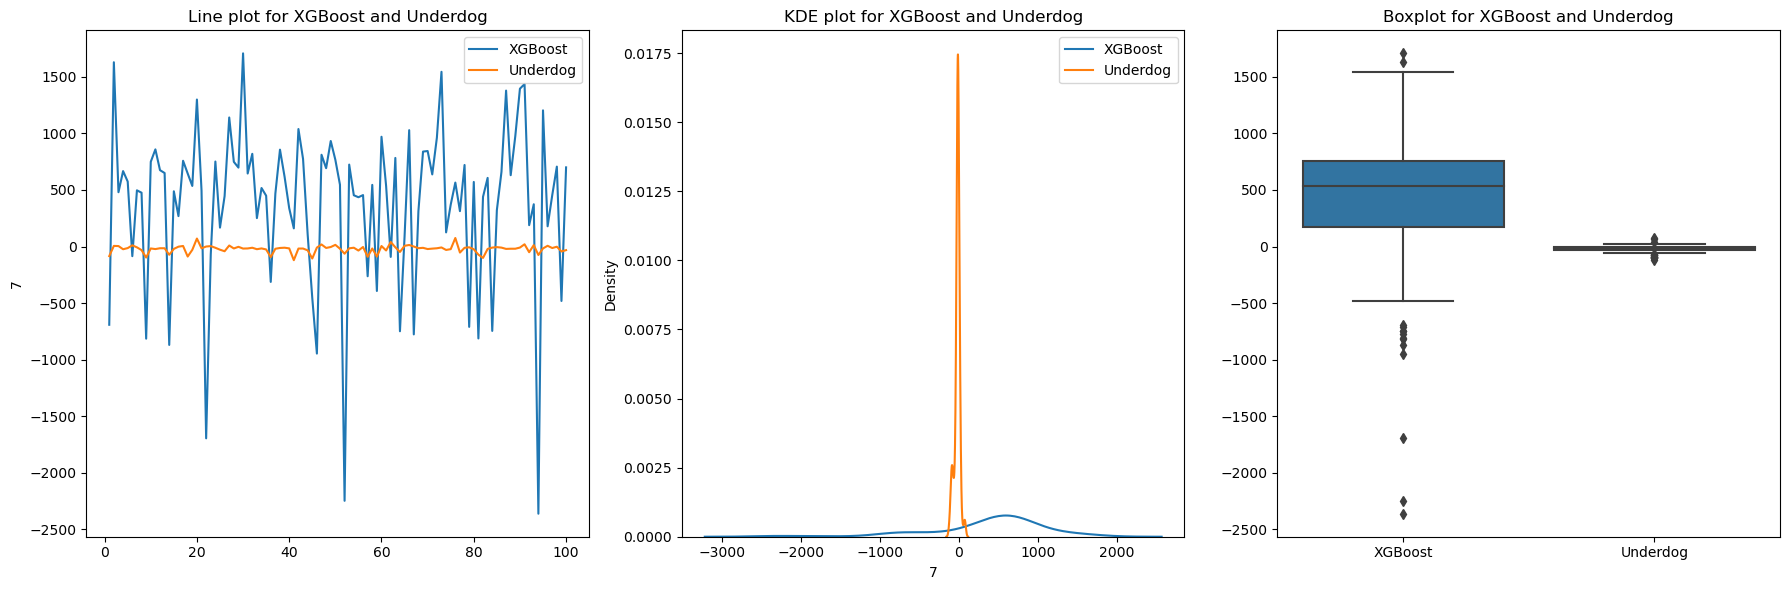

P_value_xgboost 2.3448407659998338e-07
P_value_Underdog 6.320791499092593e-07
not normal
There is a statistically significant difference
P-Value 1.4679603272572638e-13



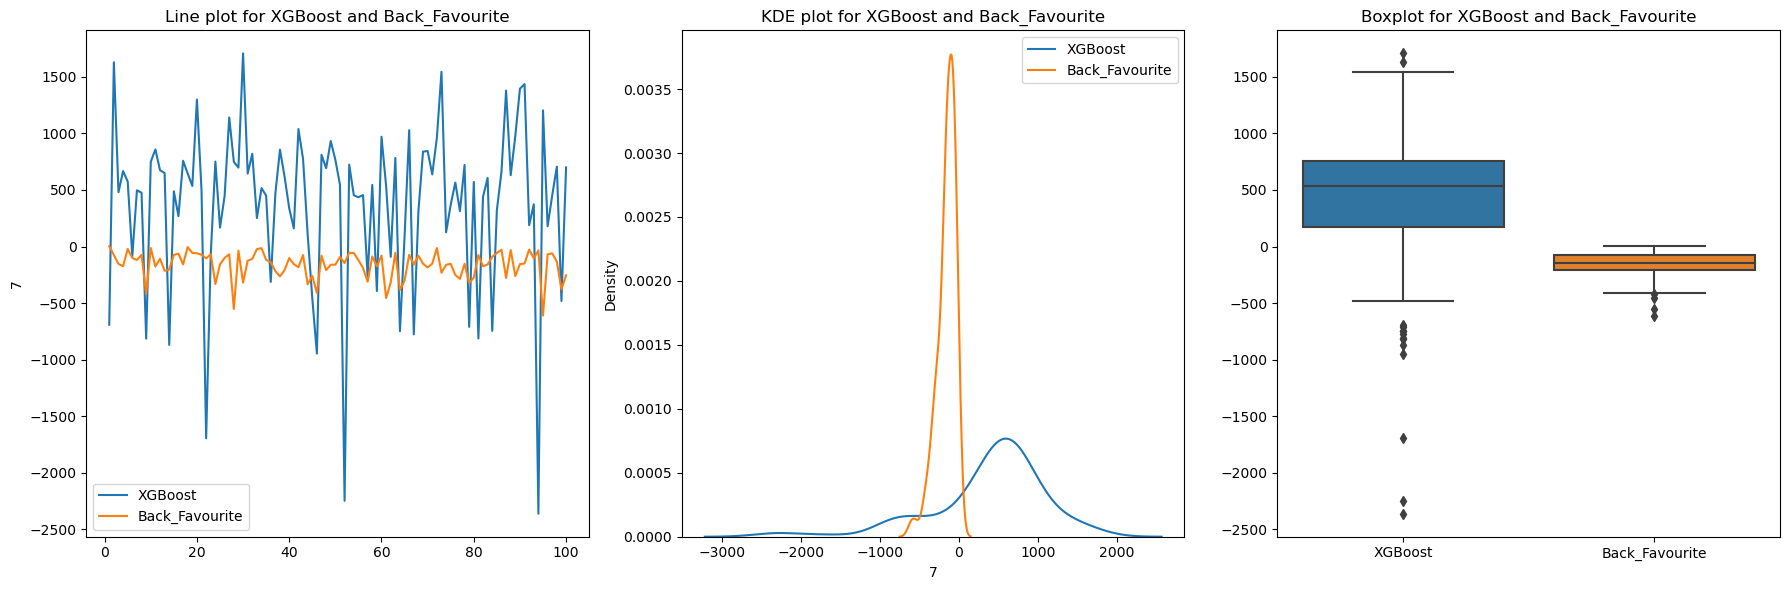

P_value_xgboost 2.3448407659998338e-07
P_value_Back_Favourite 1.3464713219946134e-06
not normal
There is a statistically significant difference
P-Value 1.985693443146762e-15



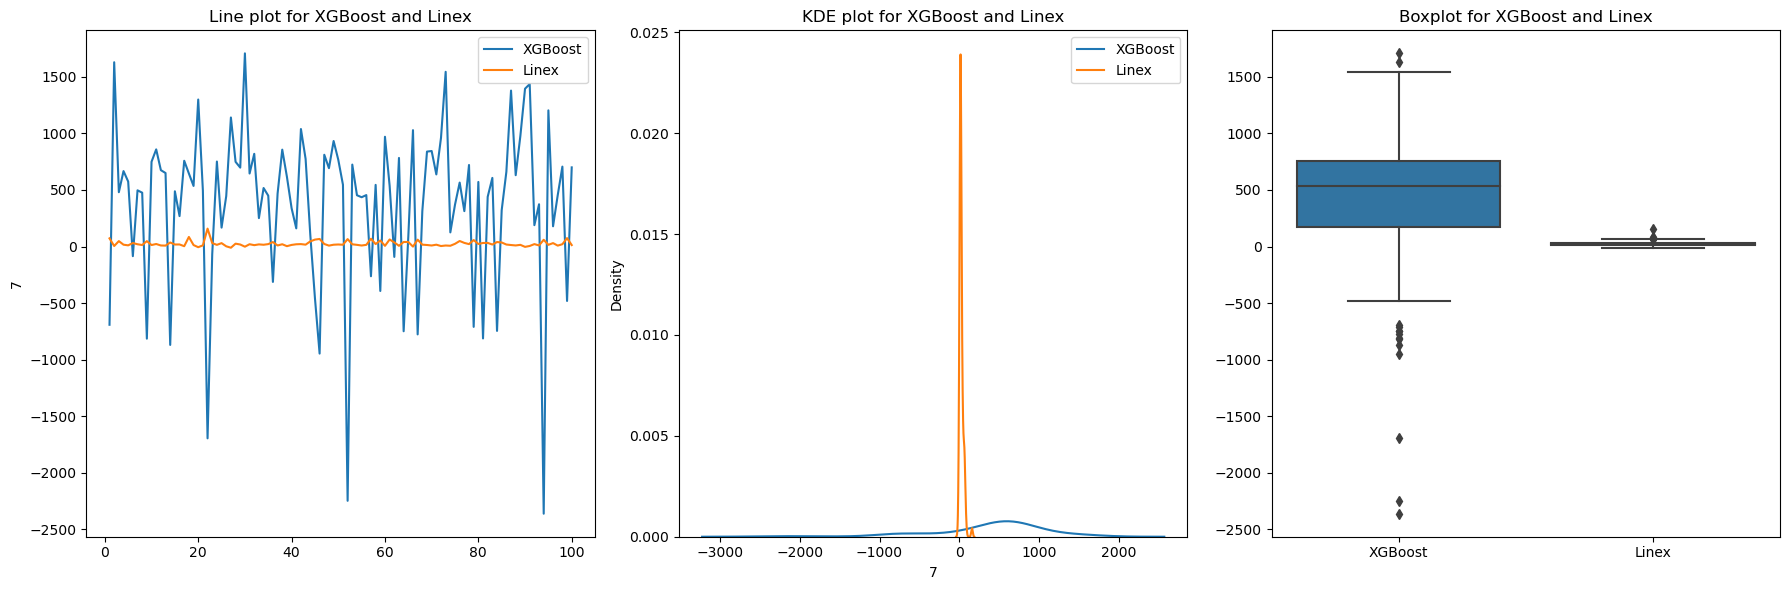

P_value_xgboost 2.3448407659998338e-07
P_value_Linex 4.101292638836185e-10
not normal
There is a statistically significant difference
P-Value 2.449594716005794e-13



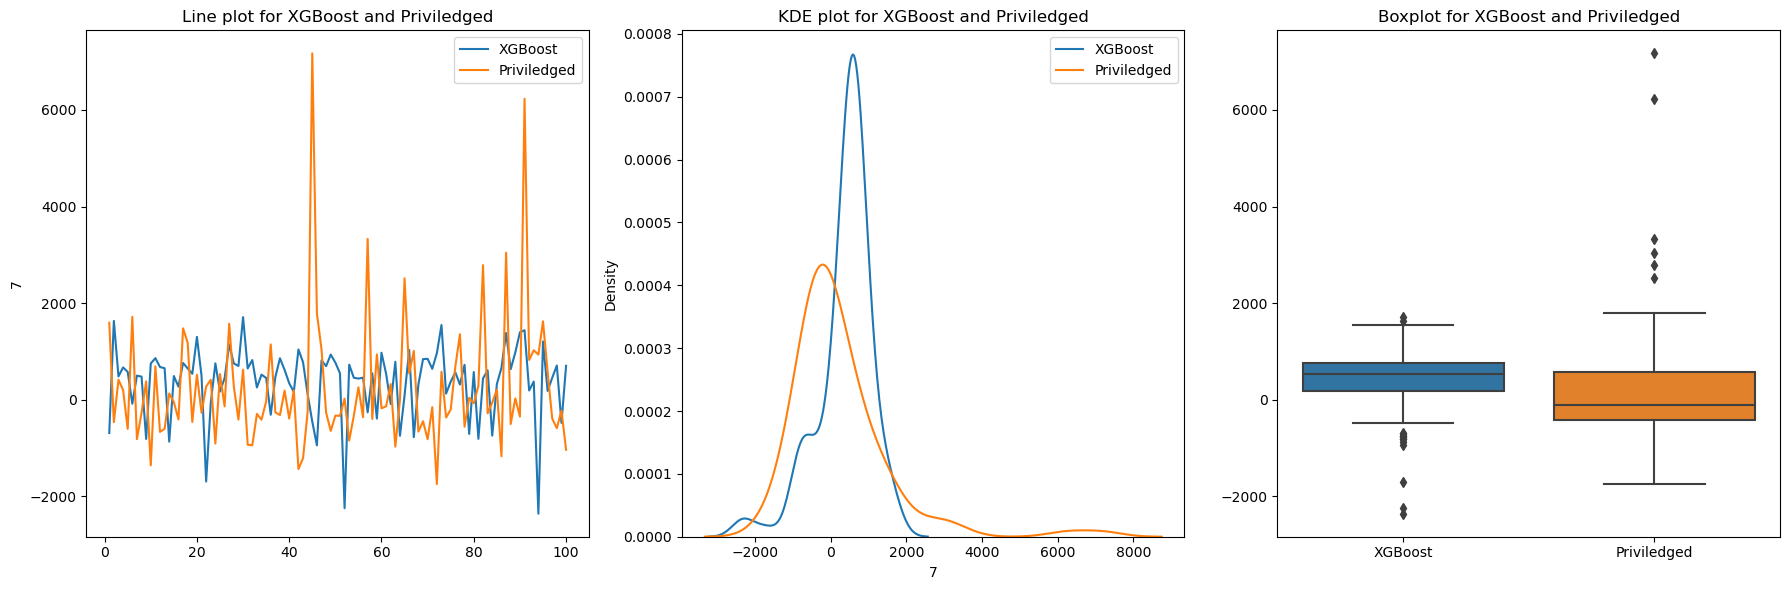

P_value_xgboost 2.3448407659998338e-07
P_value_Priviledged 2.2829092782838956e-11
not normal
There is a statistically significant difference
P-Value 0.0004649884310517811



In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged"]

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost_avg_balance, ax=axes[0], label='XGBoost')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost and {agent_name}')
    axes[0].legend()

    # KDE plot for the distributions
    sns.kdeplot(xgboost_avg_balance, ax=axes[1], label='XGBoost')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost and {agent_name}')
    axes[1].legend()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost_avg_balance.rename('XGBoost'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost and {agent_name}')
    
    plt.tight_layout()
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost = stats.shapiro(xgboost_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost", pvalue_xgboost)
    print(f"P_value_{agent_name}", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


In [93]:
import pandas as pd

# Prepare an empty list to hold the results
results_list = []

# Loop through as before
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # ... [your plotting code]

    # Check normality for both columns
    _, pvalue_xgboost = stats.shapiro(xgboost_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)

    # Dictionary to hold current results
    current_results = {
        "Agent": agent_name,
        "P_value_xgboost": pvalue_xgboost,
        f"P_value_{agent_name}": pvalue_other_agent,
    }

    # If both are normally distributed
    if pvalue_xgboost > 0.05 and pvalue_other_agent > 0.05:
        statistic, pvalue = stats.ttest_ind(xgboost_avg_balance, other_agent_balance)
        test_used = "T-test"
    else:
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost_avg_balance, other_agent_balance)
        test_used = "Mann-Whitney U"

    current_results["Test Used"] = test_used
    current_results["Statistic"] = statistic
    current_results["P-Value"] = pvalue

    # Append results to the list
    results_list.append(current_results)

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results_list)

# Display the DataFrame
print(results_df)



            Agent  P_value_xgboost  P_value_Random       Test Used  Statistic  \
0          Random     2.344841e-07    7.973647e-10  Mann-Whitney U     8068.0   
1     Leader_Wins     2.344841e-07             NaN  Mann-Whitney U     7367.0   
2        Underdog     2.344841e-07             NaN  Mann-Whitney U     8025.0   
3  Back_Favourite     2.344841e-07             NaN  Mann-Whitney U     8251.0   
4           Linex     2.344841e-07             NaN  Mann-Whitney U     7997.0   
5     Priviledged     2.344841e-07             NaN  Mann-Whitney U     6433.0   

        P-Value  P_value_Leader_Wins  P_value_Underdog  \
0  6.625015e-14                  NaN               NaN   
1  7.369500e-09         1.318621e-10               NaN   
2  1.467960e-13                  NaN      6.320791e-07   
3  1.985693e-15                  NaN               NaN   
4  2.449595e-13                  NaN               NaN   
5  4.649884e-04                  NaN               NaN   

   P_value_Back_Favourite

In [94]:
# Simplify the DataFrame
simplified_df = results_df[["Agent", "Test Used", "Statistic", "P-Value"]].copy()

# Convert p-values to scientific notation with 3 decimals
simplified_df["P-Value"] = simplified_df["P-Value"].apply(lambda x: "{:.3e}".format(x))

# Display the simplified DataFrame
print(simplified_df)


            Agent       Test Used  Statistic    P-Value
0          Random  Mann-Whitney U     8068.0  6.625e-14
1     Leader_Wins  Mann-Whitney U     7367.0  7.369e-09
2        Underdog  Mann-Whitney U     8025.0  1.468e-13
3  Back_Favourite  Mann-Whitney U     8251.0  1.986e-15
4           Linex  Mann-Whitney U     7997.0  2.450e-13
5     Priviledged  Mann-Whitney U     6433.0  4.650e-04


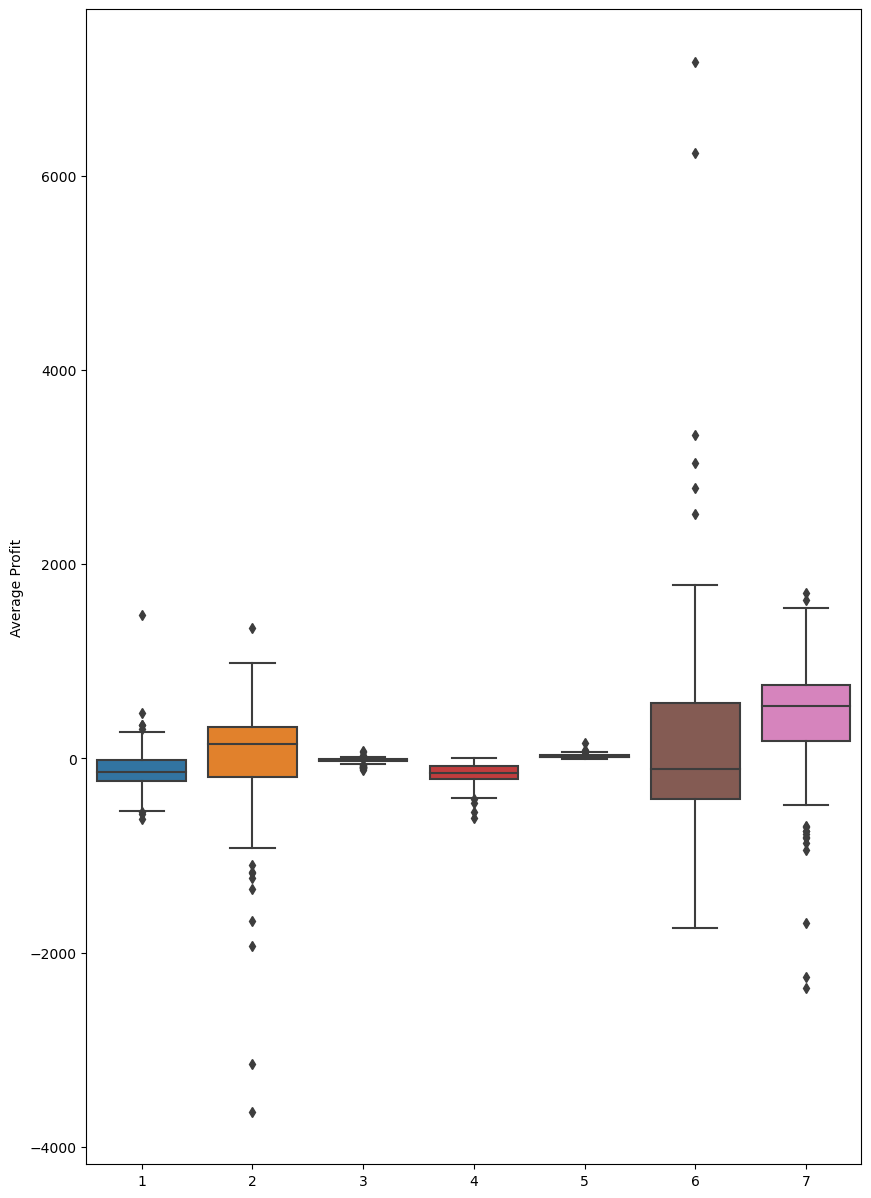

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
boxPlot = sns.boxplot(data=averaged_df)

boxPlot.set(ylabel='Average Profit')
plt.show()

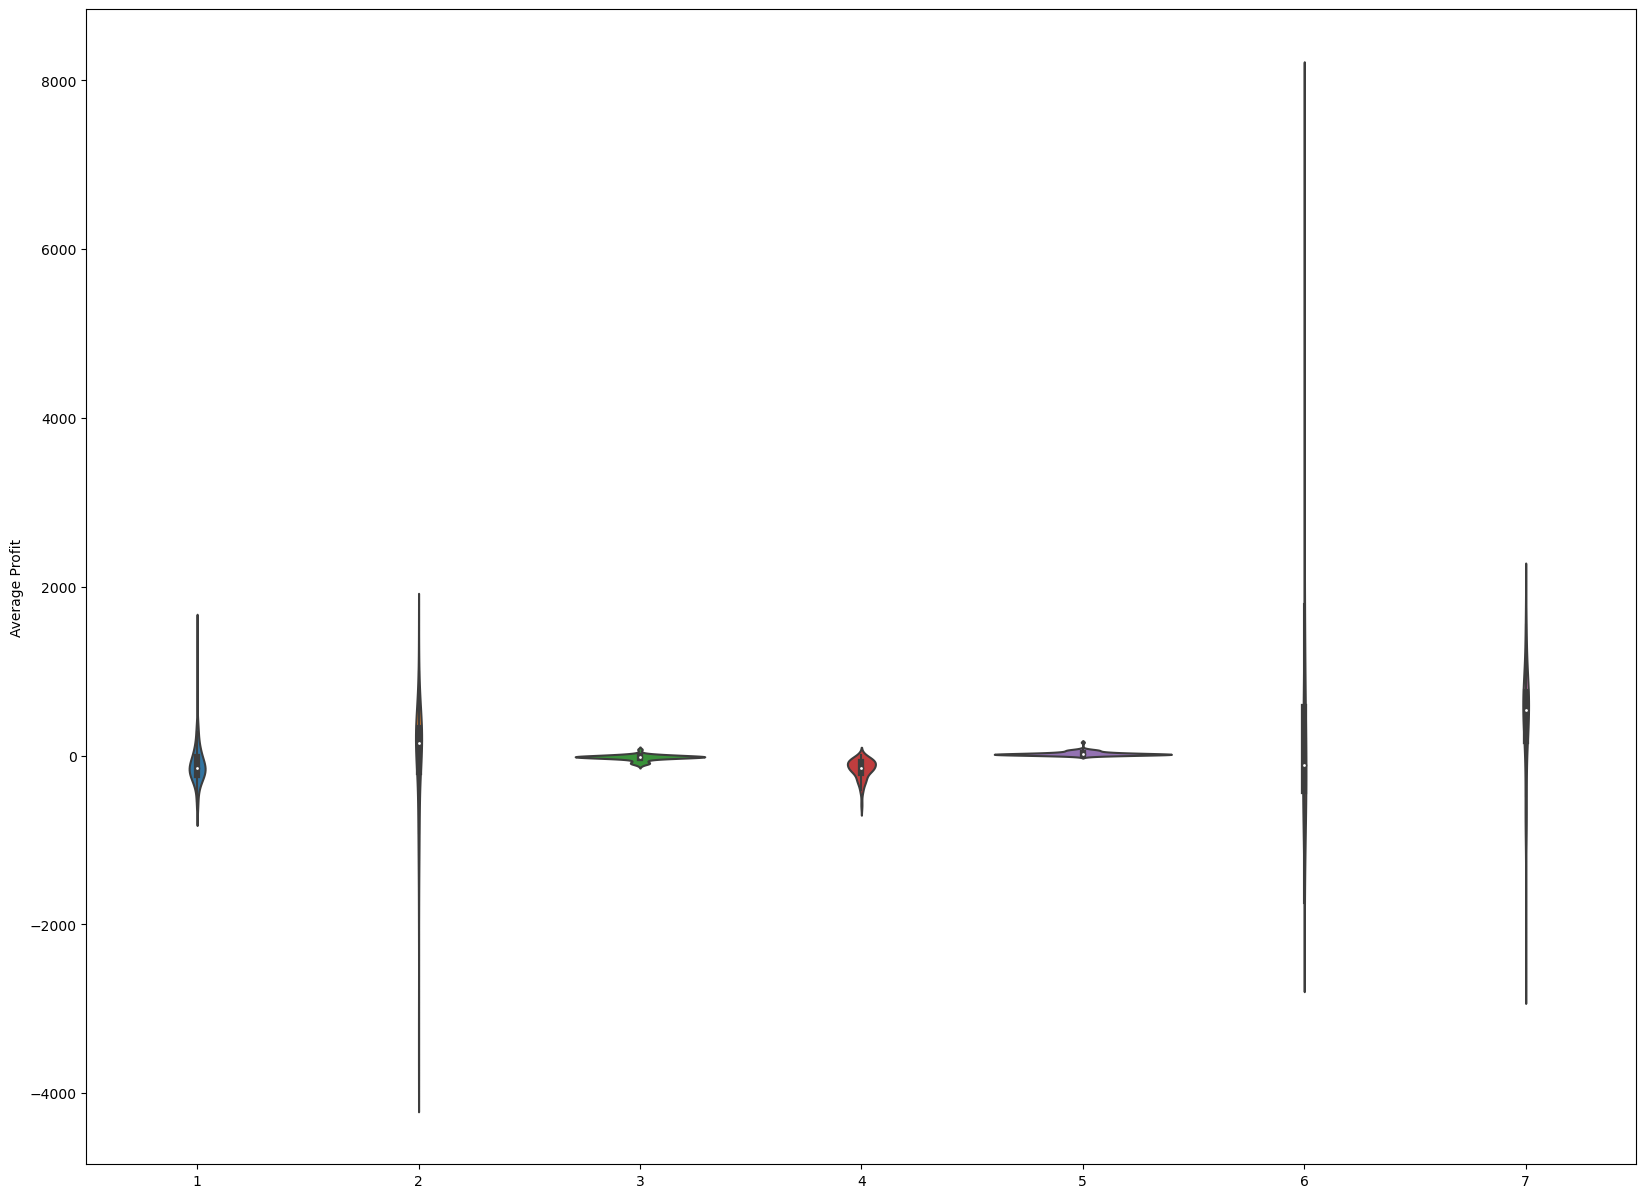

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
boxPlot = sns.violinplot(data=averaged_df)

boxPlot.set(ylabel='Average Profit')
plt.show()

In [58]:
def filter_quantiles(column):
    lower = column.quantile(0.1)
    upper = column.quantile(0.9)
    return column[(column >= lower) & (column <= upper)]

# Apply the function to each column
filtered_df = averaged_df.apply(filter_quantiles)
filtered_df = filtered_df.dropna()

print(filtered_df)

             1           2          3           4          5            6  \
3  -156.437169 -188.921103   4.129426 -153.547763  47.875290   413.331908   
4  -112.439225 -137.721476 -24.083311 -174.042617  16.151846   197.085915   
7   -86.351782  353.567246  -7.274661 -118.991954  20.084776  -819.074220   
8  -162.056911  153.761044 -31.531824  -73.696125  13.421070  -275.918253   
11 -127.200000 -469.500000 -22.500000 -177.000000  22.350000   688.500000   
12 -199.535365  310.032904 -15.148960 -108.200383   9.301386  -668.404127   
13 -185.289815  384.832022 -15.296540 -214.477873   8.152765  -605.880544   
16  -93.153497  209.919509  -1.349504  -63.200000  18.300000  -410.133016   
19  -45.277755   81.750000 -29.250000  -57.150000  13.050000  -462.044489   
21 -118.050479   84.561689 -15.780605  -72.450000  10.350000  -271.361209   
23 -245.215424  109.029169   3.729026  -68.918225  30.156244   410.510335   
25 -203.612253   11.300492 -28.023051 -158.162757  30.048349   529.668118   

[Text(0, 0.5, 'Average Profit')]

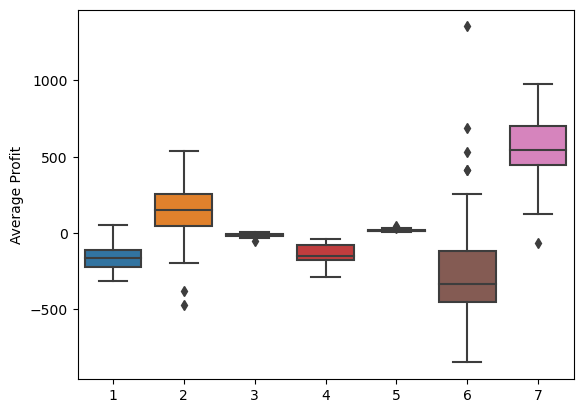

In [59]:
boxPlot = sns.boxplot(data=filtered_df)
boxPlot.set(ylabel='Average Profit')

## Statistical Testing

### Test Normal Distribution

In [68]:

from scipy import stats
for col in filtered_df.columns:
    statistic, pvalue = stats.shapiro(averaged_df[col])
    print(pvalue)
    if pvalue < 0.05:
        print("Condition " + "{:}".format(col) + 
              ". We can reject the null hypothesis (p=" + 
              "{:.30f}".format(pvalue) + 
              "). Therefore, data is not normally distributed.")
    else:
        print("Condition " + "{:}".format(col) + 
              ". We cannot reject the null hypothesis (p=" + 
              "{:.30f}".format(pvalue) + 
              "). Therefore, data is normally distributed.")

7.973646742875928e-10
Condition 1. We can reject the null hypothesis (p=0.000000000797364674287592833934). Therefore, data is not normally distributed.
1.3186210456872516e-10
Condition 2. We can reject the null hypothesis (p=0.000000000131862104568725158060). Therefore, data is not normally distributed.
6.320791499092593e-07
Condition 3. We can reject the null hypothesis (p=0.000000632079149909259285777807). Therefore, data is not normally distributed.
1.3464713219946134e-06
Condition 4. We can reject the null hypothesis (p=0.000001346471321994613390415907). Therefore, data is not normally distributed.
4.101292638836185e-10
Condition 5. We can reject the null hypothesis (p=0.000000000410129263883618477848). Therefore, data is not normally distributed.
2.2829092782838956e-11
Condition 6. We can reject the null hypothesis (p=0.000000000022829092782838955600). Therefore, data is not normally distributed.
2.3448407659998338e-07
Condition 7. We can reject the null hypothesis (p=0.0000002344

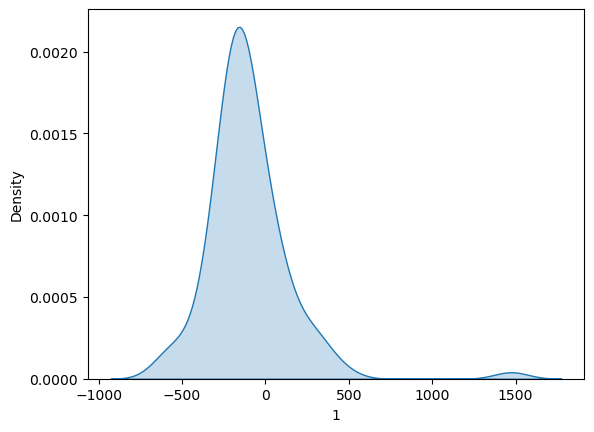

In [69]:
import seaborn as sns 
distributionPlot = sns.kdeplot(data=averaged_df[1],fill=True)

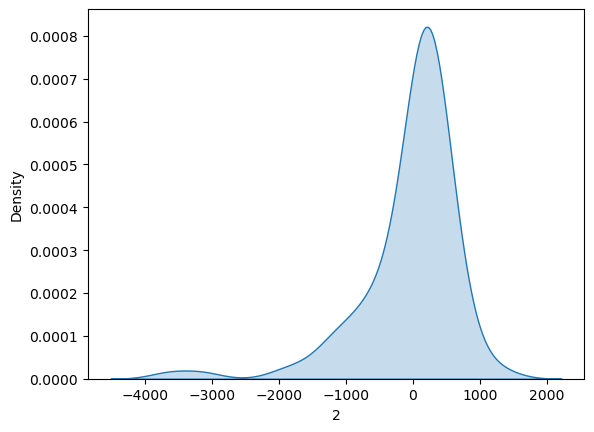

In [70]:
import seaborn as sns 
distributionPlot = sns.kdeplot(data=averaged_df[2],fill=True)

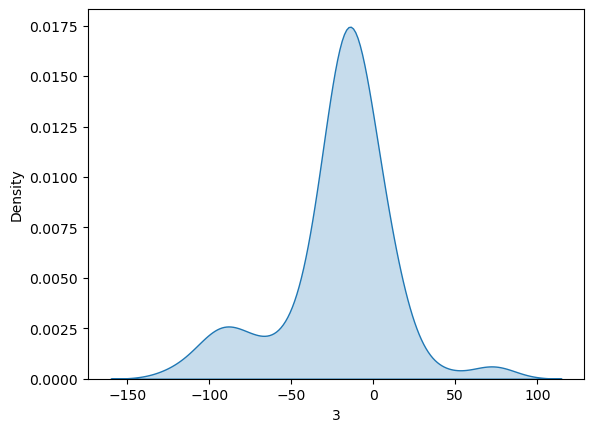

In [71]:
import seaborn as sns 
distributionPlot = sns.kdeplot(data=averaged_df[3],fill=True)

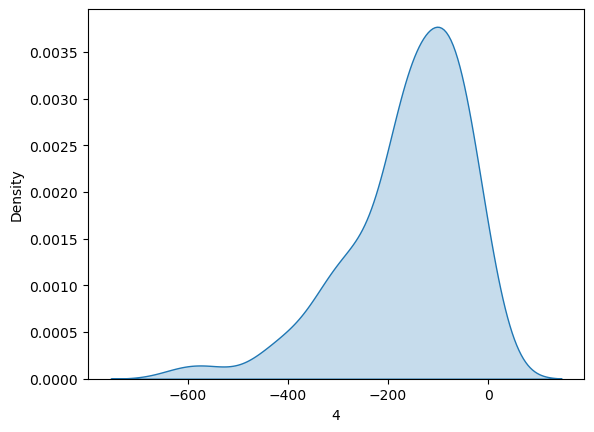

In [72]:
import seaborn as sns 
distributionPlot = sns.kdeplot(data=averaged_df[4],fill=True)

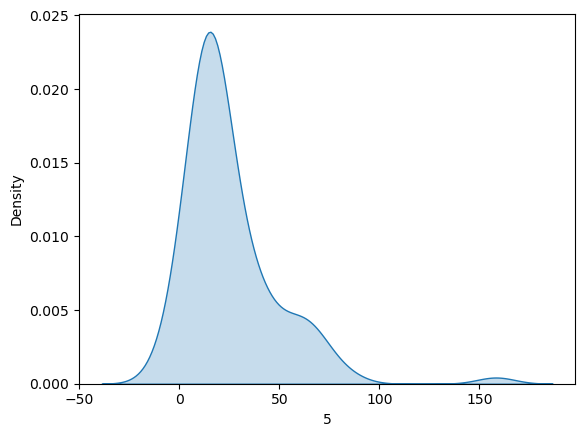

In [73]:
import seaborn as sns 
distributionPlot = sns.kdeplot(data=averaged_df[5],fill=True)

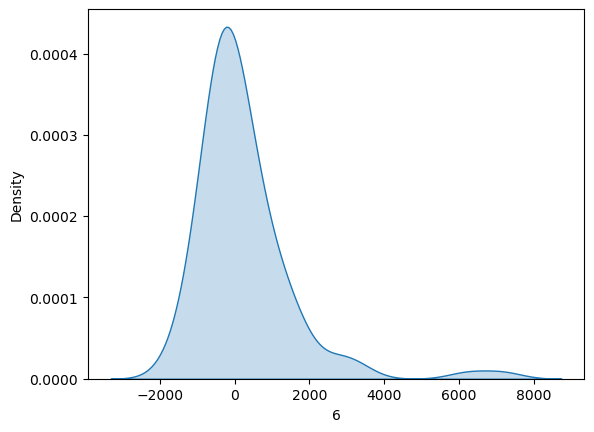

In [74]:
import seaborn as sns 
distributionPlot = sns.kdeplot(data=averaged_df[6],fill=True)

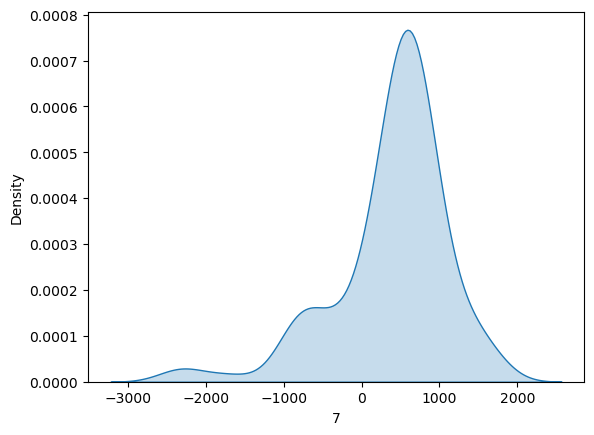

In [75]:
import seaborn as sns 
distributionPlot = sns.kdeplot(data=averaged_df[7],fill=True)